In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## EDA

In [30]:
df = pd.read_csv('train.csv')

In [31]:
df.shape

(105000, 34)

In [32]:
df.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,10,United-States,Child_U18_Unmarried,M,Mex_Amer,0.0,0.0,Unmarried,0.0,0,NaN,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,NaN,United-States,Machine operators assmblrs & inspctrs,46,United-States,Non_Relative,M,All_Other,0.0,0.0,Divorced,0.0,6,No,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Handlers equip cleaners etc,35,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,2,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Executive admin and managerial,61,United-States,Householder,F,All_Other,0.0,0.0,Divorced,0.0,3,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [33]:
df.dtypes

ID                      int64
year_of_poll            int64
own_self_emp            int64
veteran benefits        int64
currently_enrolled     object
race                   object
father_country         object
educ                   object
house_stat             object
major_ind_code         object
labour_union           object
self_country           object
major_occ_code         object
age                     int64
mother_country         object
house_summary          object
gender                 object
hisp_origin            object
gains                 float64
dividends             float64
marriage_status        object
losses                float64
employer_of             int64
house_1yr_ago          object
income_filled          object
weeks_worked            int64
under18                object
hourly_wage           float64
unemp_reason           object
citizenship            object
woker_type             object
fed_liability          object
full_partime_job       object
income    

In [34]:
df.describe()

,ID,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
count,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,52499.50000,2004.500305,0.176800,1.517305,36.243924,488.464764,240.232046,25.321047,1.953057,20.898371,93.484943
std,30311.03347,0.500002,0.555648,0.850049,23.465922,5284.877430,2501.629980,186.824899,2.361890,22.041670,461.214547
min,0.00000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26249.75000,2004.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52499.50000,2005.000000,0.000000,2.000000,35.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
75%,78749.25000,2005.000000,0.000000,2.000000,52.000000,0.000000,0.000000,0.000000,4.000000,47.000000,0.000000
max,104999.00000,2005.000000,2.000000,2.000000,94.000000,109998.900000,119998.800000,3225.600000,6.000000,47.000000,16998.300000


In [35]:
df.drop(columns='ID', inplace=True)

In [36]:
df.describe(exclude='number')

,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,mother_country,house_summary,gender,hisp_origin,marriage_status,house_1yr_ago,income_filled,under18,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
count,73557,105000,105000,105000,104989,105000,69669,105000,51945,105000,105000,105000,105000,105000,51678,72597,28984,3189,105000,52165,105000,103608,105000
unique,2,5,43,17,31,24,2,43,14,43,8,2,10,7,2,2,4,5,5,8,6,8,2
top,College/University,White,United-States,High school graduate,Householder,Not in universe or children,no,United-States,Adm support including clerical,United-States,Householder,F,All_Other,Unmarried,Yes,No,Both_Pr,Re-entrant,NB_US,Pvt,Nonfiler,Children/Armed_Forces,Less than 50K $
freq,42386,88078,83720,25608,28081,53055,59270,93022,7708,84324,39817,54582,90262,45521,43444,56142,20427,1081,93024,37967,39588,64168,65272


In [37]:
target = 'income'

In [38]:
df[target].value_counts(normalize=True)

Less than 50K $    0.621638
More than 50K $    0.378362
Name: income, dtype: float64

In [39]:
df.isna().sum()

year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [40]:
df.drop(columns = ['under18', 'unemp_reason'], inplace=True)

In [41]:
categorical_columns = df.select_dtypes('object').columns.tolist()
categorical_columns.remove(target)
numerical_columns = df.select_dtypes('number').columns.tolist()

In [43]:
print(categorical_columns)
print(numerical_columns)

['currently_enrolled', 'race', 'father_country', 'educ', 'house_stat', 'major_ind_code', 'labour_union', 'self_country', 'major_occ_code', 'mother_country', 'house_summary', 'gender', 'hisp_origin', 'marriage_status', 'house_1yr_ago', 'income_filled', 'citizenship', 'woker_type', 'fed_liability', 'full_partime_job']
['year_of_poll', 'own_self_emp', 'veteran benefits', 'age', 'gains', 'dividends', 'losses', 'employer_of', 'weeks_worked', 'hourly_wage']


## Preprocessing

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV, train_test_split

In [25]:
from sklearn.metrics import fbeta_score, make_scorer, f1_score, accuracy_score, average_precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [50]:
def perform_imputation_simple(X_train, X_test, numerical_columns, categorical_cols):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    # median imputation for numerical columns
    imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
    imp_num.fit(X_train[numerical_columns])
    X_train_imputed[numerical_columns] = imp_num.transform(X_train[numerical_columns])
    X_test_imputed[numerical_columns] = imp_num.transform(X_test[numerical_columns])
    
    # Mode imputation for categorical variables (nominal columns already include new column for missing)
    imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_cat.fit(X_train[categorical_cols])
    X_train_imputed[categorical_cols] = imp_cat.transform(X_train[categorical_cols])
    X_test_imputed[categorical_cols] = imp_cat.transform(X_test[categorical_cols])
    
    return X_train_imputed, X_test_imputed, imp_num, imp_cat

In [60]:
def encode_categorical(X_train, X_test, numerical_columns, categorical_columns):
    ohe = OneHotEncoder(sparse=False, drop='if_binary')
    # nulls are assigned as new subcategory
    
    ohe.fit(X_train[categorical_columns])
    x2 = pd.DataFrame(ohe.transform(X_train[categorical_columns]), columns=ohe.get_feature_names_out())
    X_train = pd.concat([X_train[numerical_columns], x2], axis=1)
    
    x2 = pd.DataFrame(ohe.transform(X_test[categorical_columns]), columns=ohe.get_feature_names_out())
    X_test = pd.concat([X_test[numerical_columns], x2], axis=1)
    
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    
    return X_train, X_test, ohe

In [55]:
def transform_data(X_train, X_val, columns):
    pt = PowerTransformer()
    X_train_tf = X_train.copy()
    X_val_tf = X_val.copy()

    pt.fit(X_train[columns])
    X_train_tf[columns] = pt.transform(X_train[columns])
    X_val_tf[columns] = pt.transform(X_val[columns])
    return X_train_tf, X_val_tf, pt

In [61]:
train, val = train_test_split(df, test_size=0.25, random_state=200)

In [62]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

In [63]:
X_train = train.drop(columns=target)
y_train = train[target].copy()

In [64]:
X_val = val.drop(columns=target)
y_val = val[target].copy()

In [65]:
X_train, X_val, imp_num, imp_cat = perform_imputation_simple(X_train, X_val, numerical_columns, categorical_columns)

In [66]:
X_train.isna().sum().sum(), X_val.isna().sum().sum()

(0, 0)

In [67]:
X_train, X_val, encoder_onehot = encode_categorical(X_train, X_val, numerical_columns, categorical_columns)

In [68]:
X_train_tf, X_val_tf, transformer = transform_data(X_train, X_val, X_train.columns.tolist())

In [89]:
X_train_tf.head(3)

,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,currently_enrolled_College/University,race_ Black,race_ Other,race_ White,race_Amer/Indian/Aleut/Eskimo,race_Asian/Pacific_Islander,father_country_ ?,father_country_ Cambodia,father_country_ Canada,father_country_ China,father_country_ Columbia,father_country_ Cuba,father_country_ Dominican-Republic,father_country_ Ecuador,father_country_ El-Salvador,father_country_ England,father_country_ France,father_country_ Germany,father_country_ Greece,father_country_ Guatemala,father_country_ Haiti,father_country_ Holand-Netherlands,father_country_ Honduras,father_country_ Hong Kong,father_country_ Hungary,father_country_ India,father_country_ Iran,father_country_ Ireland,father_country_ Italy,father_country_ Jamaica,father_country_ Japan,father_country_ Laos,father_country_ Mexico,father_country_ Nicaragua,father_country_ Outlying-U S (Guam USVI etc),father_country_ Panama,father_country_ Peru,father_country_ Philippines,father_country_ Poland,father_country_ Portugal,father_country_ Puerto-Rico,father_country_ Scotland,father_country_ South Korea,father_country_ Taiwan,father_country_ Thailand,father_country_ Trinadad&Tobago,father_country_ United-States,father_country_ Vietnam,father_country_ Yugoslavia,educ_ 10th grade,educ_ 11th grade,educ_ 12th grade no diploma,educ_ 1st 2nd 3rd or 4th grade,educ_ 5th or 6th grade,educ_ 7th and 8th grade,educ_ 9th grade,educ_ Associates degree-academic program,educ_ Associates degree-occup /vocational,educ_ Bachelors degree(BA AB BS),educ_ Children,educ_ Doctorate degree(PhD EdD),educ_ High school graduate,educ_ Less than 1st grade,educ_ Masters degree(MA MS MEng MEd MSW MBA),educ_ Prof school degree (MD DDS DVM LLB JD),educ_ Some college but no degree,house_stat_ Child 18+ ever marr Not in a subfamily,house_stat_ Child 18+ ever marr RP of subfamily,house_stat_ Child 18+ never marr Not in a subfamily,house_stat_ Child 18+ never marr RP of subfamily,house_stat_ Child 18+ spouse of subfamily RP,house_stat_ Child <18 ever marr RP of subfamily,house_stat_ Child <18 ever marr not in subfamily,house_stat_ Child <18 never marr RP of subfamily,house_stat_ Child <18 never marr not in subfamily,house_stat_ Child under 18 of RP of unrel subfamily,house_stat_ Grandchild 18+ ever marr RP of subfamily,house_stat_ Grandchild 18+ ever marr not in subfamily,house_stat_ Grandchild 18+ never marr not in subfamily,house_stat_ Grandchild 18+ spouse of subfamily RP,house_stat_ Grandchild <18 never marr child of subfamily RP,house_stat_ Grandchild <18 never marr not in subfamily,house_stat_ Householder,house_stat_ In group quarters,house_stat_ Nonfamily householder,house_stat_ Other Rel 18+ ever marr RP of subfamily,house_stat_ Other Rel 18+ ever marr not in subfamily,house_stat_ Other Rel 18+ never marr RP of subfamily,house_stat_ Other Rel 18+ never marr not in subfamily,house_stat_ Other Rel 18+ spouse of subfamily RP,house_stat_ Other Rel <18 never marr child of subfamily RP,house_stat_ Other Rel <18 never marr not in subfamily,house_stat_ Other Rel <18 never married RP of subfamily,house_stat_ RP of unrelated subfamily,house_stat_ Secondary individual,house_stat_ Spouse of RP of unrelated subfamily,house_stat_ Spouse of householder,major_ind_code_ Agriculture,major_ind_code_ Armed Forces,major_ind_code_ Business and repair services,major_ind_code_ Communications,major_ind_code_ Construction,major_ind_code_ Education,major_ind_code_ Entertainment,major_ind_code_ Finance insurance and real estate,major_ind_code_ Forestry and fisheries,major_ind_code_ Hospital services,major_ind_code_ Manufacturing-durable goods,major_ind_code_ Manufacturing-nondurable goods,major_ind_code_ Medical except hospital,major_ind_code_ Mining,major_ind_code_ Not in universe or children,major_ind_code_ Other professional services,major_ind_code_ Personal services except private HH,major_ind_code_ Private household services,major_ind_c

In [72]:
df[categorical_columns].nunique().sum()

282

In [73]:
len(numerical_columns)

10

In [74]:
(df[categorical_columns].nunique()==2).sum()

5

In [75]:
# 282 - 5 + 10 = 287 

In [300]:
target_mapping = {'More than 50K $': 0, 'Less than 50K $': 1}

In [80]:
y_train = y_train.map(target_mapping)

In [81]:
y_val = y_val.map(target_mapping)

In [77]:
sample = pd.read_csv('Sample_Submission.csv')

In [78]:
sample['income'].mean()

0.0650952380952381

In [280]:
test = pd.read_csv('test.csv')

In [281]:
test.shape

(42000, 33)

In [282]:
test_ids = test['ID']
test = test.drop(columns='ID')

In [283]:
test.drop(columns = ['under18', 'unemp_reason'], inplace=True)

In [284]:
X_test = test.copy()

In [285]:
X_test[numerical_columns] = imp_num.transform(X_test[numerical_columns])
X_test[categorical_columns] = imp_cat.transform(X_test[categorical_columns])

In [286]:
x2 = pd.DataFrame(encoder_onehot.transform(X_test[categorical_columns]), columns=encoder_onehot.get_feature_names_out())
X_test = pd.concat([X_test[numerical_columns], x2], axis=1)

In [287]:
X_test_tf = X_test.copy()
X_test_tf[X_test.columns.tolist()] = transformer.transform(X_test[X_test.columns.tolist()])

In [288]:
X_test_tf.columns.tolist()==X_train_tf.columns.tolist()

True

In [289]:
X_test_tf.head(3)

,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,currently_enrolled_College/University,race_ Black,race_ Other,race_ White,race_Amer/Indian/Aleut/Eskimo,race_Asian/Pacific_Islander,father_country_ ?,father_country_ Cambodia,father_country_ Canada,father_country_ China,father_country_ Columbia,father_country_ Cuba,father_country_ Dominican-Republic,father_country_ Ecuador,father_country_ El-Salvador,father_country_ England,father_country_ France,father_country_ Germany,father_country_ Greece,father_country_ Guatemala,father_country_ Haiti,father_country_ Holand-Netherlands,father_country_ Honduras,father_country_ Hong Kong,father_country_ Hungary,father_country_ India,father_country_ Iran,father_country_ Ireland,father_country_ Italy,father_country_ Jamaica,father_country_ Japan,father_country_ Laos,father_country_ Mexico,father_country_ Nicaragua,father_country_ Outlying-U S (Guam USVI etc),father_country_ Panama,father_country_ Peru,father_country_ Philippines,father_country_ Poland,father_country_ Portugal,father_country_ Puerto-Rico,father_country_ Scotland,father_country_ South Korea,father_country_ Taiwan,father_country_ Thailand,father_country_ Trinadad&Tobago,father_country_ United-States,father_country_ Vietnam,father_country_ Yugoslavia,educ_ 10th grade,educ_ 11th grade,educ_ 12th grade no diploma,educ_ 1st 2nd 3rd or 4th grade,educ_ 5th or 6th grade,educ_ 7th and 8th grade,educ_ 9th grade,educ_ Associates degree-academic program,educ_ Associates degree-occup /vocational,educ_ Bachelors degree(BA AB BS),educ_ Children,educ_ Doctorate degree(PhD EdD),educ_ High school graduate,educ_ Less than 1st grade,educ_ Masters degree(MA MS MEng MEd MSW MBA),educ_ Prof school degree (MD DDS DVM LLB JD),educ_ Some college but no degree,house_stat_ Child 18+ ever marr Not in a subfamily,house_stat_ Child 18+ ever marr RP of subfamily,house_stat_ Child 18+ never marr Not in a subfamily,house_stat_ Child 18+ never marr RP of subfamily,house_stat_ Child 18+ spouse of subfamily RP,house_stat_ Child <18 ever marr RP of subfamily,house_stat_ Child <18 ever marr not in subfamily,house_stat_ Child <18 never marr RP of subfamily,house_stat_ Child <18 never marr not in subfamily,house_stat_ Child under 18 of RP of unrel subfamily,house_stat_ Grandchild 18+ ever marr RP of subfamily,house_stat_ Grandchild 18+ ever marr not in subfamily,house_stat_ Grandchild 18+ never marr not in subfamily,house_stat_ Grandchild 18+ spouse of subfamily RP,house_stat_ Grandchild <18 never marr child of subfamily RP,house_stat_ Grandchild <18 never marr not in subfamily,house_stat_ Householder,house_stat_ In group quarters,house_stat_ Nonfamily householder,house_stat_ Other Rel 18+ ever marr RP of subfamily,house_stat_ Other Rel 18+ ever marr not in subfamily,house_stat_ Other Rel 18+ never marr RP of subfamily,house_stat_ Other Rel 18+ never marr not in subfamily,house_stat_ Other Rel 18+ spouse of subfamily RP,house_stat_ Other Rel <18 never marr child of subfamily RP,house_stat_ Other Rel <18 never marr not in subfamily,house_stat_ Other Rel <18 never married RP of subfamily,house_stat_ RP of unrelated subfamily,house_stat_ Secondary individual,house_stat_ Spouse of RP of unrelated subfamily,house_stat_ Spouse of householder,major_ind_code_ Agriculture,major_ind_code_ Armed Forces,major_ind_code_ Business and repair services,major_ind_code_ Communications,major_ind_code_ Construction,major_ind_code_ Education,major_ind_code_ Entertainment,major_ind_code_ Finance insurance and real estate,major_ind_code_ Forestry and fisheries,major_ind_code_ Hospital services,major_ind_code_ Manufacturing-durable goods,major_ind_code_ Manufacturing-nondurable goods,major_ind_code_ Medical except hospital,major_ind_code_ Mining,major_ind_code_ Not in universe or children,major_ind_code_ Other professional services,major_ind_code_ Personal services except private HH,major_ind_code_ Private household services,major_ind_c

## Automl

In [2]:
import autosklearn.classification

In [231]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600,
    per_run_time_limit=120,
    n_jobs=-1,
    metric=autosklearn.metrics.accuracy
)

In [236]:
df_automl = df.copy()

In [237]:
df_automl[categorical_columns] = df_automl[categorical_columns].astype('category')

In [238]:
trainset, valset = train_test_split(df_automl, test_size=0.3, random_state=100)

In [239]:
automl.fit(trainset.drop(columns=target), trainset[target], valset.drop(columns=target), valset[target], dataset_name='volkswagon-hack')

/home/sparsh/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/sparsh/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


[ERROR] [2022-09-10 13:35:22,138:asyncio.events] 
Traceback (most recent call last):
  File "/home/sparsh/.local/lib/python3.8/site-packages/distributed/utils.py", line 778, in wrapper
    return await func(*args, **kwargs)
  File "/home/sparsh/.local/lib/python3.8/site-packages/distributed/client.py", line 1211, in _reconnect
    await self._ensure_connected(timeout=timeout)
  File "/home/sparsh/.local/lib/python3.8/site-packages/distributed/client.py", line 1241, in _ensure_connected
    comm = await connect(
  File "/home/sparsh/.local/lib/python3.8/site-packages/distributed/comm/core.py", line 315, in connect
    await asyncio.sleep(backoff)
  File "/usr/lib/python3.8/asyncio/tasks.py", line 659, in sleep
    return await future
asyncio.exceptions.CancelledError
[ERROR] [2022-09-10 13:35:22,166:asyncio.events] 
Traceback (most recent call last):
  File "/home/sparsh/.local/lib/python3.8/site-packages/distributed/utils.py", line 778, in wrapper
    return await func(*args, **kwargs)

AutoSklearnClassifier(metric=accuracy, n_jobs=-1, per_run_time_limit=120,
                      time_left_for_this_task=600)

In [292]:
automl.leaderboard()[:5]

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
26,1,0.46,random_forest,0.354113,83.860324
17,2,0.18,gradient_boosting,0.355061,98.291348
38,3,0.10,gradient_boosting,0.355349,45.997023
16,4,0.04,gradient_boosting,0.356669,76.218971
24,5,0.04,lda,0.366028,10.899489


In [247]:
results = pd.DataFrame(automl.cv_results_)

In [258]:
best_result = results.loc[results['rank_test_scores']==1].iloc[0]

In [259]:
best_result['params']

{'balancing:strategy': 'none',
 'classifier:__choice__': 'random_forest',
 'data_preprocessor:__choice__': 'feature_type',
 'feature_preprocessor:__choice__': 'select_rates_classification',
 'classifier:random_forest:bootstrap': 'True',
 'classifier:random_forest:criterion': 'entropy',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.2266963951269948,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 5,
 'classifier:random_forest:min_samples_split': 11,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent',
 'data_preprocessor

In [246]:
automl.score(valset.drop(columns=target), valset[target])

[WARNING] [2022-09-10 13:39:59,771:Client-Validation] Auto-sklearn previously received targets of type <class 'pandas.core.series.Series'> yet the current features have type <class 'numpy.ndarray'>. Changing the dtype of inputs to an estimator might cause problems


0.6488888888888888

In [296]:
test_automl = test.copy()
test_automl[categorical_columns] = test_automl[categorical_columns].astype('category')
automl_test_pred = automl.predict(test_automl)

[WARNING] [2022-09-10 13:58:03,947:Client-Validation] Changing the dtype of the features after fit() is not recommended. Fit() method was called with {'year_of_poll': 'int64', 'own_self_emp': 'int64', 'veteran benefits': 'int64', 'currently_enrolled': 'category', 'race': 'category', 'father_country': 'category', 'educ': 'category', 'house_stat': 'category', 'major_ind_code': 'category', 'labour_union': 'category', 'self_country': 'category', 'major_occ_code': 'category', 'age': 'int64', 'mother_country': 'category', 'house_summary': 'category', 'gender': 'category', 'hisp_origin': 'category', 'gains': 'float64', 'dividends': 'float64', 'marriage_status': 'category', 'losses': 'float64', 'employer_of': 'int64', 'house_1yr_ago': 'category', 'income_filled': 'category', 'weeks_worked': 'int64', 'hourly_wage': 'float64', 'citizenship': 'category', 'woker_type': 'category', 'fed_liability': 'category', 'full_partime_job': 'category'} whereas the new features have {'year_of_poll': 'int64', '

In [310]:
automl_test_pred = pd.Series(automl_test_pred).map(target_mapping)

In [311]:
automl_test_pred.mean()

0.9254523809523809

## Neural Network

In [82]:
import tensorflow as tf
from tensorflow import keras

2022-09-10 12:21:48.748237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 12:21:48.748618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [290]:
train_features = np.array(X_train_tf)
val_features = np.array(X_val_tf)
test_features = np.array(X_test_tf)

In [110]:
neg, pos = np.bincount(y_train)
total = pos+neg

In [111]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.49483361])

In [175]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.32
Weight for class 1: 0.80


In [208]:
class_weight = {0: 1.2, 1: 1}

In [209]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None, n_features=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(n_features,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(24, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
    ])

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=5e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [210]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color='blue', label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color='red', label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')


In [211]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color='blue', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='orange', linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend()


In [212]:
EPOCHS = 50
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)


In [213]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.49483361])

In [229]:
weighted_model = make_model(n_features=X_train_tf.shape[1], output_bias=None)
# weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
    validation_data=(val_features, y_val),
    # The class weights go here
    class_weight=class_weight)

Restoring model weights from the end of the best epoch: 30.
Epoch 50: early stopping


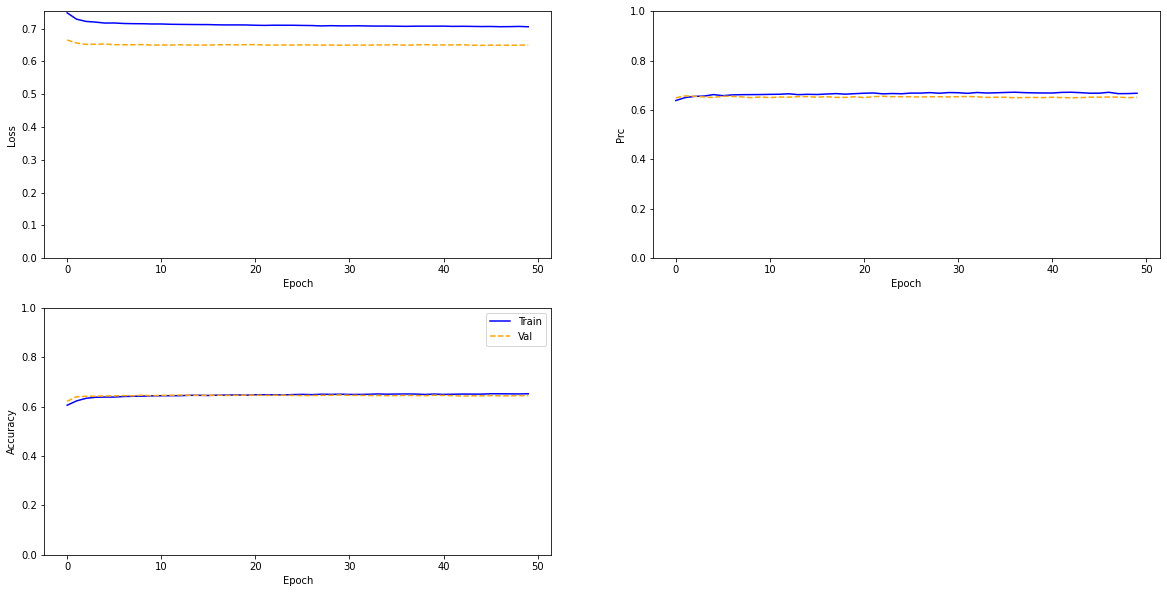

In [230]:
plt.figure(figsize=(20,10))
plot_metrics(weighted_history)

In [216]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE).squeeze()
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE).squeeze()

13/13 [==============================] - 0s 2ms/step


In [217]:
y_val_pred.mean()

0.8468571428571429

In [218]:
y_val_pred = np.where(val_predictions_weighted>0.5, 1, 0)

<AxesSubplot:ylabel='Count'>

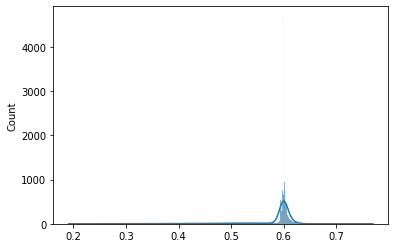

In [219]:
sns.histplot(val_predictions_weighted, kde=True)

In [220]:
accuracy_score(y_val, y_val_pred)

0.6474285714285715

In [221]:
# Accuracy among class 0
accuracy_score(y_val[y_val_pred==0], y_val_pred[y_val_pred==0])

0.6478937728937729

In [222]:
# Accuracy among class 1
accuracy_score(y_val[y_val_pred==1], y_val_pred[y_val_pred==1])

0.6473863541926369

In [223]:
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE).squeeze()
test_pred = np.where(test_predictions_weighted>0.5, 1, 0)

21/21 [==============================] - 0s 2ms/step


In [224]:
test_pred.mean()

0.9152380952380952

## Submission

In [312]:
submission = pd.DataFrame()
submission['ID'] = test_ids
# submission[target] = test_pred
submission[target] = automl_test_pred

In [313]:
submission.to_csv('submissions/sparsh_4.csv', index=False)